## Introduction to Apache Spark

Spark is easier to program and execute faster than Hadoop MapReduce. <br/> On top of the Spark core data processing engine, there are libraries for SQL, machine learning, graph computation, and stream processing. <br/> <br/> The 3 main concept of big data are 
1. **Distributed Data**: A file is split into chunks, called data blocks, and distributed amongst the data nodes and replicated across the cluster.
2. **Distribute computation**: The Map and reduce function are sent to the data nodes. This helps to parallelize the function.
    - The mapping process runs on each assigned data node, working only on its block of data from a distributed file.
    - The results from the mapping processes are sent to the reducers in a process called "shuffle and sort": key/value pairs from the mappers are sorted by key, partitioned by the number of reducers, and then sent across the network and written to key sorted "sequence files" on the reducer nodes.
    - The reducer process executes on its assigned node and works only on its subset of the data (its sequence file). The output from the reducer process is written to an output file.
3. **Tolerate faults**: both data and computation can tolerate failures by failing over to another node for data or processing.
<br/><br/>
When multiple MapReduce jobs are chained together, for each MapReduce job, data is read from a distributed file block into a map process, written to and read from a SequenceFile in between, and then written to an output file from a reducer process.

#### The advantages of Spark over MapReduce are:
- Spark executes much faster by caching data in memory across multiple parallel operations, whereas MapReduce involves more reading and writing from disk. It can run tasks up to 100 times faster, when it utilizes the in-memory computations and 10 times faster when it uses disk than traditional map-reduce tasks.
- Spark runs multi-threaded tasks inside of JVM processes, whereas MapReduce runs as heavier weight JVM processes. This gives Spark faster startup, better parallelism, and better CPU utilization.
- Spark provides a richer functional programming model than MapReduce.
- Spark is especially useful for parallel processing of distributed data with iterative algorithms.

A Spark application runs as independent processes, coordinated by the SparkSession object in the driver program.<br/>
**Spark Context**: It holds a connection with Spark cluster manager. All Spark applications run as independent set of processes, coordinated by a SparkContext in a program.<br/>
The resource or cluster manager assigns tasks to workers, one task per partition.<br/>
**Cluster Manager**: Cluster manager allocates resources to each application in driver program. There are three types of cluster managers supported by Apache Spark – **Standalone, Mesos and YARN**.They all are different in terms of scheduling, security and monitoring. Once SparkContext connects to the cluster manager, it acquires executors on a cluster node, these executors are worker nodes on cluster which work independently on each tasks and interact with each other.<br/>
A task applies its unit of work to the dataset in its partition and outputs a new partition dataset. Because iterative algorithms apply operations repeatedly to data, they benefit from caching datasets across iterations.
Results are sent back to the driver application or can be saved to disk.<br/>
**Driver and Worker**: A driver is incharge of the process of running the main() function of an application and creating the SparkContext. A worker, on the other hand, is any node that can run program in the cluster. If a process is launched for an application, then this application acquires executors at worker node.

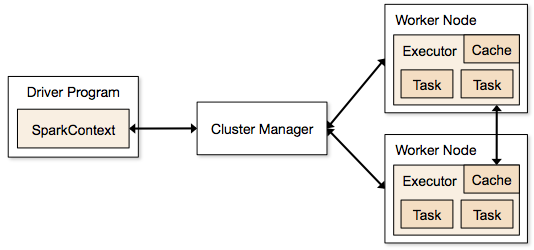

Some of the Spark use cases are:

1. **Stream processing**: Common use cases are streaming ETL, Trigger event detection, Data enrichment, etc,
2. **Machine learning**: Machine Learning Library (MLlib): Network security 
3. **Interactive analytics**: MapReduce was built to handle batch processing, and SQL-on-Hadoop engines such as Hive or Pig are frequently too slow for interactive analysis. However, Apache Spark, is fast enough to perform exploratory queries without sampling. By combining Spark with visualization tools, complex data sets can be processed and visualized interactively.
4. **Fog Computing**: he IoT embeds objects and devices with tiny sensors that communicate with each other and the user, creating a fully interconnected world. This world collects massive amounts of data, processes it, and delivers revolutionary new features and applications for people to use in their everyday lives. However, as the IoT expands so too does the need for distributed massively parallel processing of vast amounts and varieties of machine and sensor data. All that processing, however, is tough to manage with the current analytics capabilities in the cloud. Fog computing decentralizes data processing and storage, instead performing those functions on the edge of the network. 
<br/>https://www.qubole.com/blog/apache-spark-use-cases/

In [ ]:
import sys
sys.executable

In [ ]:
# Link the spark directory
# Instead of using conda's pyspark, I downloaded spark from its website. 
import findspark
findspark.init('/home/ashwani/spark/spark-2.4.3-bin-hadoop2.7')

In [ ]:
# Import pyspark libraries
from pyspark import SparkContext, SparkConf

In [ ]:
#Create Spark context
conf = SparkConf().setAppName("Learning Spark")
sc = SparkContext(conf = conf)

In [ ]:
# Create a RDD
data = range(1,21)
print(type(data))
rdd = sc.parallelize(data)

**RDD (Resilient Distributed Database)** is a collection of elements, that can be divided across multiple nodes in a cluster to run parallel processing. It is also fault tolerant collection of elements, which means it can automatically recover from failures. RDD is immutable, we can create RDD once but can’t change it. We can apply any number of operation on it and can create another RDD by applying some transformations. <br/><br/>
- **In-Memory Computations**: It improves the performance by an order of magnitudes.<br/>
- **Lazy Evaluation**: All transformations in RDDs are lazy, i.e, doesn’t compute their results right away.<br/>
- **Fault Tolerant**: RDDs track data lineage information to rebuild lost data automatically.<br/>
- **Immutability**: Data can be created or retrieved anytime and once defined, its value can’t be changed.<br/>
- **Partitioning**: It is the fundamental unit of parallelism in PySpark RDD.<br/>
- **Persistence**: Users can reuse PySpark RDDs and choose a storage strategy for them.<br/>
- **Coarse-Grained Operations**: These operations are applied to all elements in data sets through maps or filter or group by operation.<br/><br/><br/>
**We can apply 2 types of operations on RDDs:<br/>
Transformation (Filter, groupBy, flatMap and map)**: Transformation refers to the operation applied on a RDD to create new RDD.<br/>
**Action (collect, reduce, take, first)**: Actions refer to an operation which also apply on RDD that perform computation and send the result back to driver.

In [ ]:
%%time
print("Type of variable: ", type(rdd))
print("Number of elements in RDD : ", rdd.count())
print("Print the first element of RDD : ", rdd.first())
print("Print the first 4 elements of RDD : ", rdd.take(4))
print("Content of RDD : ", rdd.collect())

In [ ]:
%%time
# Add the list in rdd
print("Sum of the list ", rdd.reduce(lambda x,y: x+y))

#### Breakdown of RDD ####
RDD is partitioned. Lets us check the data in each partition.

In [ ]:
print("Number of partitions ", rdd.getNumPartitions())
print("Distribution of data in partitions", rdd.glom().collect())

The rdd is divided in 4 partitions. Each reduce action is parallelized over the partition. 1 task on each partition at a time. So this speeds up the task. Lets see further

In [ ]:
def f(x,y):
    print ("x is %i and y is %i" %(x, y))
    return x+y

In [ ]:
%%time
rdd.reduce(lambda x,y: f(x, y))

1st iteration: Apply reduce function on each partition and store the result in cache.<br/>
2nd iteration: Apply reduce function on the result of partition iteratively.


### USING String 

In [ ]:
data = 'RDD is a collection of elements, that can be divided across multiple nodes in a cluster to run parallel processing'

In [ ]:
%%time
rdd1 = sc.parallelize(data)

In [ ]:
def printRDD(rdd):
    print("Type of variable: ", type(rdd))
    print("Number of elements in RDD : ", rdd.count())
    print("Print the first element of RDD : ", rdd.first())
    print("Print the first 4 elements of RDD : ", rdd.take(4))
    print("Content of RDD : ", rdd.collect())
    print("Number of partitions ", rdd.getNumPartitions())
    print("Distribution of data in partitions", rdd.glom().collect())

In [ ]:
%%time
printRDD(rdd1)

In the above example, the string is converted to list of individual characters by RDD. This is because RDD is similar to list but is parallelized so computation is faster.<br/> Let us pass the data variable as a list of one sentence.

In [ ]:
[data]

In [ ]:
rdd2 = sc.parallelize([data])

In [ ]:
%%time
printRDD(rdd2)

---------------------<br/>
The number of elements in RDD is 1, so it is not partitioned and is saved as 1 partition. the other 3 partitions are empty. <br/> Here instead of individual characters, the sentense is of one element.

In [ ]:
%%time
# Apply some transformation
# MAP transformation. it applies the function on each element. Here we split the element. 
# As we apply transformation, the rdd type is changed to PipelinedRDD
# wordRDD = rdd2.map(lambda x: x.split())
wordRDD_map = rdd2.map(lambda x: x.lower().split(' '))
printRDD(wordRDD_map)

In [ ]:
%%time
wordRDD_flatmap = rdd2.flatMap(lambda x: x.lower().split(' '))
printRDD(wordRDD_flatmap)

----------------<br/>See the number of elements in RDD to understand the difference between map and flatMap.<br/> In both these cases we are just utilising 1 partition only

In [ ]:
%%time
wordRDD_pair1 = wordRDD_map.map(lambda x:(x,1))
printRDD(wordRDD_pair1)

---------------<br/>In this case as the number of elements is one, the pairing is only one.

In [ ]:
%%time
wordRDD_pair2 = wordRDD_flatmap.map(lambda x:(x,1))
printRDD(wordRDD_pair2)

----------<br/>Pairing is done for each word.

In [ ]:
%%time
wordRDD_reduce = wordRDD_pair2.reduceByKey(lambda x,y: x+y).sortBy(lambda x: x[1], False)
printRDD(wordRDD_reduce)

In [ ]:
%%time
# ALl steps in one
wordRDD1 = rdd2.flatMap(lambda x: x.lower().split(' ')).map(lambda x:(x,1)).reduceByKey(lambda x,y: x+y).sortBy(lambda x: x[1], False)
printRDD(wordRDD1)

-------------------------<br/>Let us split the string into words before it is parallelized. We will check if there is any imporvement in speed.

In [ ]:
data1 = data.split(" ")

In [ ]:
%%time
rdd3 = sc.parallelize(data1)
printRDD(rdd3)

In [ ]:
%%time
# ALl steps in one
wordRDD2 = rdd3.flatMap(lambda x: x.lower().split(' ')).map(lambda x:(x,1)).reduceByKey(lambda x,y: x+y).sortBy(lambda x: x[1], False)
printRDD(wordRDD2)

---------------------------<br/>It takes almost similar amount of time as this is processed over single machine. Ideally it should speed up the process when the data is more and distributed.

Other spark transformations.

In [ ]:
%%time
# FILTER transformation. Return a new RDD containing only the elements that satisfy given condition(s)
stopwords = ['is','am','are','the','for','a', 'of', 'in', 'to']
filterRDD = wordRDD1.filter(lambda x: x not in stopwords)
printRDD(filterRDD)

In [ ]:
%%time
# GROUPBY transformation: It will create a set of key value pair, where key is the output of the user function. 
# and the value is all items for which the function yields this key.
groupRDD = filterRDD.groupBy(lambda w: w[0:1])
# here key is the first letter of teach word. value will be all words starting with key

In [ ]:
print ([(k, list(v)) for (k, v) in groupRDD.collect()])

In [ ]:
%%time
groupRDD.collect()

Each element in the rdd has a key and the value is iterable. 

### Reference <br/>
https://data-flair.training/blogs/spark-rdd-operations-transformations-actions/